## Demo for modelling single-channel PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='1ch',sysfile='DM_Li')

#### Edit user defined parameters

In [5]:
L.param.datapath = main_data_dir+'/1ch_smlm_tubulin/depth_1p5um_zernike_2_2_+1_1/'
L.param.savename = L.param.datapath+'psfmodel_iter'
L.param.keyword = 'depth' # keyword of the file name or the full file name without extension
L.param.gain = 0.7471
L.param.ccd_offset = 100
L.param.roi.peak_height = 0.3
L.param.option.insitu.stage_pos = 1 # micron, stage position relative to infocus at the coverslip
L.param.option.insitu.zernike_index=[5]
L.param.option.insitu.zernike_coeff=[1]
L.param.option.model.const_pupilmag = True
L.param.option.insitu.var_stagepos = False

#### Start learning

In [6]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:/EMBL files/data for PSF learning/example data for uiPSF//1ch_smlm_tubulin/depth_1p5um_zernike_2_2_+1_1\depth_1p5um_zernike_2_2_-1_1_MMStack_Pos0.ome.tif
(5000, 336, 248)
rois shape channel : (16880, 23, 23)


4/6: calculating spline coefficients: 1/1 [00:02s]  2.09s/it total time: 2.07s
5/6: localization: 4/4 [00:00s]  7.32it/s total time: 2.61s
3/6: learning: 204/250 [00:51s]  3.97it/s, current loss: 0.59050, total time: 51.41s


outlier percentage: 0.22845888724766128
rois shape channel : (1567, 23, 23)


3/6: learning: 305/? [00:47s]  6.36it/s, current loss: 0.56762, total time: 99.35s  
4/6: calculating spline coefficients: 1/1 [00:02s]  2.08s/it total time: 2.07s
5/6: localization: 4/4 [00:00s]  8.52it/s total time: 2.54s
6/6: saving results: [00:02s] total time: 5.01s
4/6: calculating spline coefficients: 1/1 [00:02s]  2.08s/it total time: 2.05s
5/6: localization: 4/4 [00:00s]  5.19it/s total time: 2.82s
3/6: learning: 205/250 [00:52s]  3.93it/s, current loss: 0.57331, total time: 52.20s


outlier percentage: 0.23118279569892475
rois shape channel : (1573, 23, 23)


3/6: learning: 216/250 [00:34s]  6.30it/s, current loss: 0.55812, total time: 86.49s
4/6: calculating spline coefficients: 1/1 [00:02s]  2.06s/it total time: 2.05s
5/6: localization: 4/4 [00:00s]  8.30it/s total time: 2.53s
6/6: saving results: [00:02s] total time: 5.04s


#### Show results

In [7]:
f,p = io.h5.load(resfile) # load result file

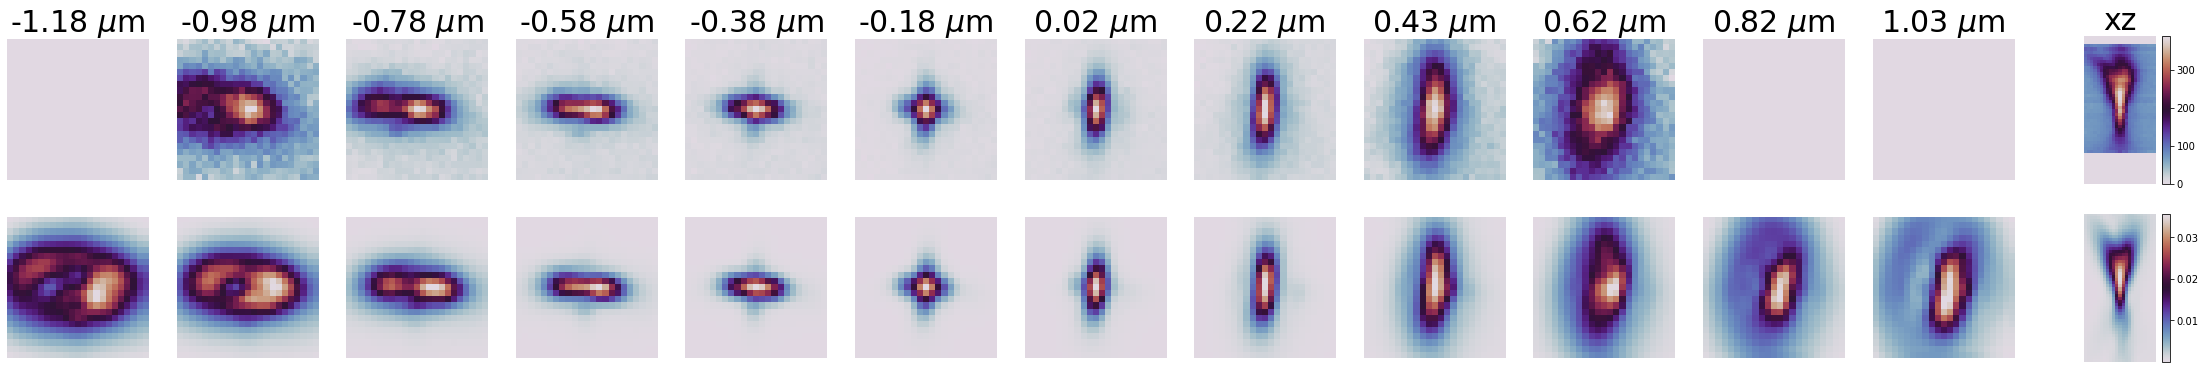

In [8]:
showpsfvsdata_insitu(f,p)

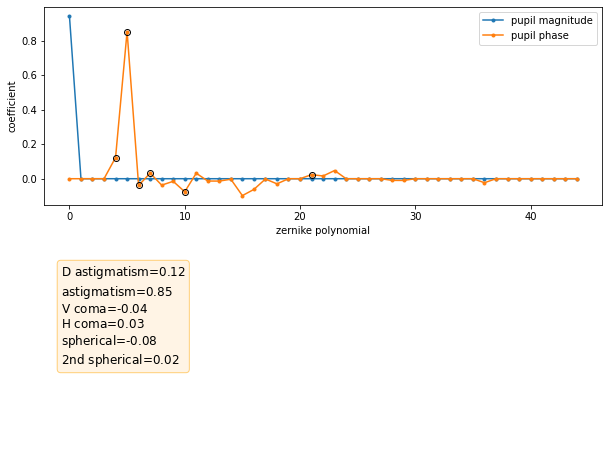

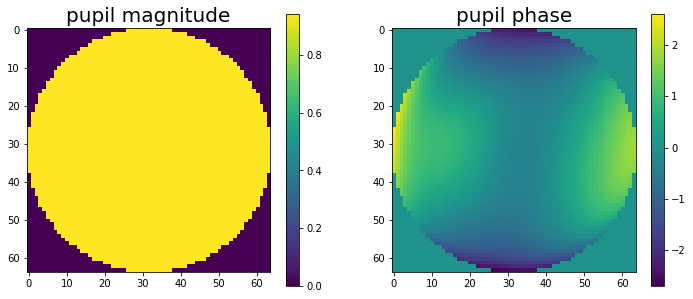

In [9]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

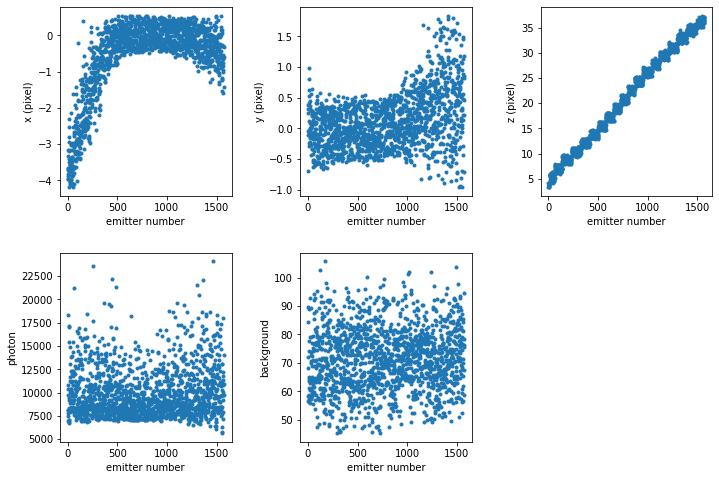

In [10]:
showlearnedparam_insitu(f,p)

#### Ouput parameters

In [11]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'apodization', 'bg', 'cor', 'cor_all', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'stagepos', 'zernike_coeff', 'zernike_polynomial', 'zoffset']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
